In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load job market
df = pd.read_csv('job-market(2).csv')
df.head(3)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,30.0,NaN


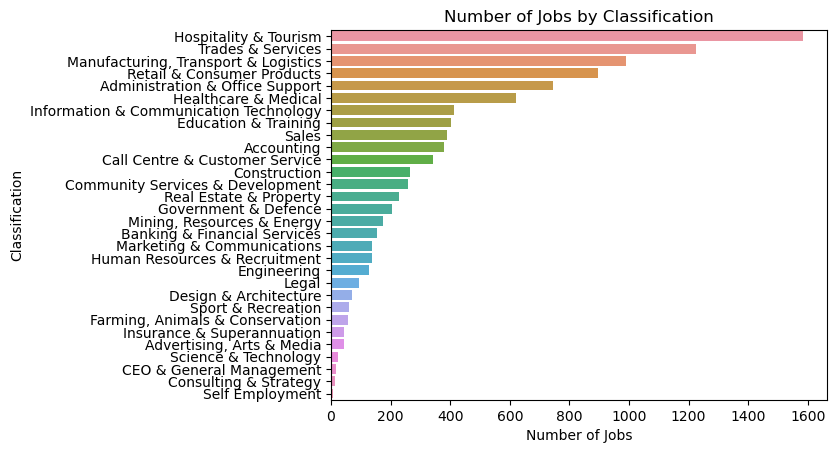

In [13]:
%matplotlib inline
value_counts = df['Classification'].value_counts()
order = value_counts.index
sns.countplot(y=df['Classification'], data=df, order=order)
plt.xlabel('Number of Jobs')
plt.title('Number of Jobs by Classification')
plt.show()

In [5]:
import matplotlib
#create dataframe for salary ranges
salaryrange=df.groupby([df['LowestSalary'],df['HighestSalary']]).size()

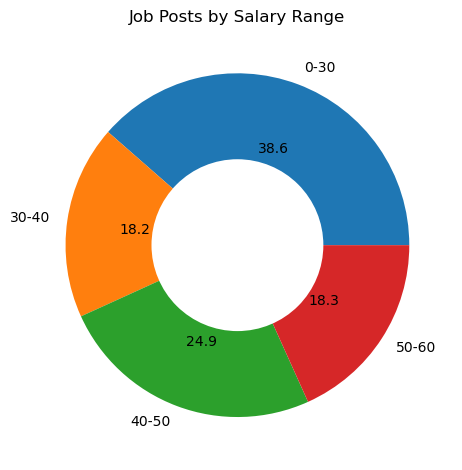

In [11]:
#salary ranges plot
plt.pie(salaryrange, labels=['0-30','30-40','40-50','50-60'], autopct='%.1f')
plt.title('Job Posts by Salary Range')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout()
plt.show()

In [27]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.head()

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Location,Count
Location,,,,,,,,,,,,,,
ACT,238,238,235,238,0,238,238,238,235,238,238,236,ACT,238
Adelaide,390,390,356,390,0,390,390,390,374,390,390,374,Adelaide,390
Adelaide Hills & Barossa,19,19,18,19,0,19,19,19,19,19,19,19,Adelaide Hills & Barossa,19
Albany & Great Southern,10,10,10,10,0,10,10,10,10,10,10,10,Albany & Great Southern,10
Albury Area,19,19,18,19,0,19,19,19,19,19,19,19,Albury Area,19


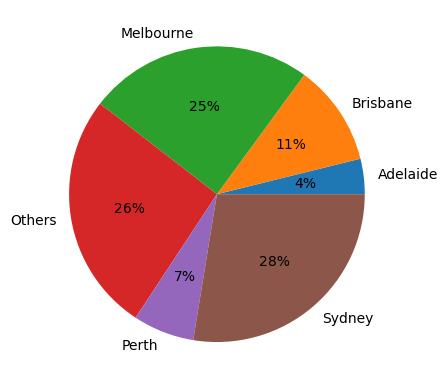

In [29]:
%matplotlib inline
# Pie char for job market share of cities
from matplotlib import cm
df_draw = locationDf.copy()
df_draw['LocationPie']=locationDf['Location']
df_draw.loc[df_draw['Count'] < 350, 'LocationPie'] = 'Others'
df_draw = df_draw.groupby('LocationPie')['Count'].sum().reset_index()
plt.pie(df_draw['Count'], labels=df_draw['LocationPie'], autopct='%.0f%%');